<a href="https://colab.research.google.com/github/nicolesaade/WorldHappinessReportAnalysis/blob/main/WorldHappinessReport_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Preparation

##1(a) Libraries

##1(b) Dictionaries

##1(c) Load Data & Fill in Missing Values

In [41]:
import statsmodels.api as sm
import pandas as pd
# Load the data
data = pd.read_excel('happiness_dataset.xls')
print(data.isnull().sum())
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(x.mean()))
print(data.isnull().sum())
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(0))
print(data.isnull().sum())

data.head()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64
Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    50
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           30
Positive affect                     24
Negative affect                     16
dtype: int64
Country name                         0
year                                 0
Life Ladder                

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


##1(d) Create a DataFrame with mean of 2018-2023 by country

In [40]:
mean_df = pd.DataFrame()

for column in data.iloc[:, -8:-2]: #We don't need positive/negative effects
  for country in data["Country name"].unique():
    country_data = data[data["Country name"] == country][column]
    average = country_data.mean()
    mean_df.loc[country, column] = average

mean_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,7.585624,0.476654,52.711667,0.480475,0.056325,0.835824
Albania,9.416875,0.714302,68.548750,0.694877,-0.068280,0.868671
Algeria,9.338236,0.811683,66.136363,0.520711,-0.132543,0.688052
Angola,8.985547,0.737973,52.150001,0.455957,-0.093218,0.867018
Argentina,10.028808,0.901894,66.700000,0.777786,-0.153203,0.839019


#2. Identify Country Groups

Cluster countries with 1)K-Means,  using the following 7 variables: life ladder, logGDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, generosity and perceptions of corruption.

##2(a) Identify Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(0, 0.5, 'Inertia')

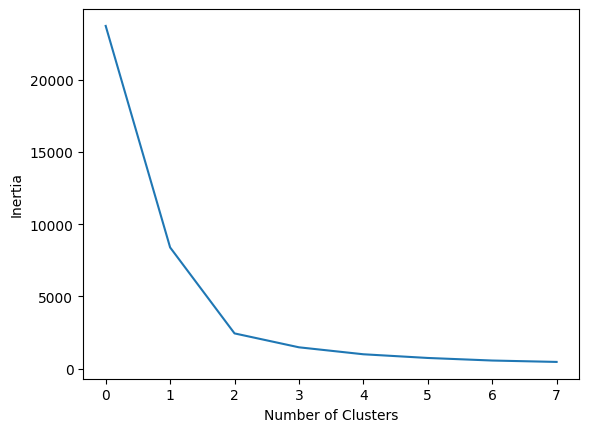

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1,9):
  model =KMeans(k)
  model.fit(mean_df) #df name??
  i = model.inertia_
  inertia.append(i)

plt.plot(inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

2  clusters
Silhouette Score:  0.864818968883209
Subjects per Cluster:  [161   4] 

3  clusters
Silhouette Score:  0.6420299517673335
Subjects per Cluster:  [ 52   4 109] 

4  clusters
Silhouette Score:  0.5366187422146843
Subjects per Cluster:  [49 45  4 67] 

5  clusters
Silhouette Score:  0.5339432216380248
Subjects per Cluster:  [65  4  9 41 46] 

6  clusters
Silhouette Score:  0.5151517316061789
Subjects per Cluster:  [34  4 33 36  9 49] 



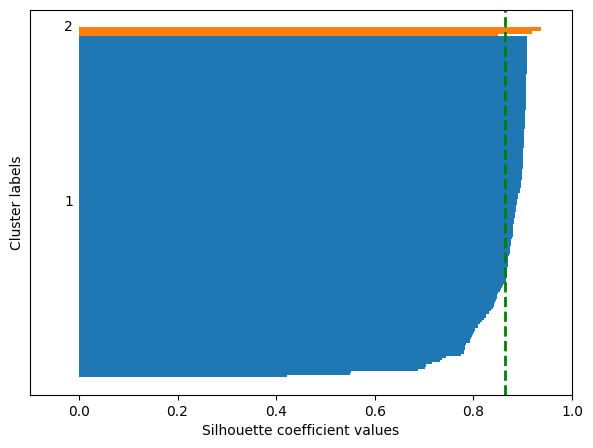

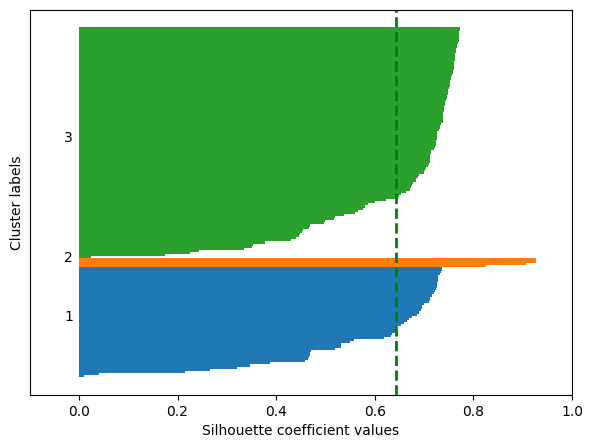

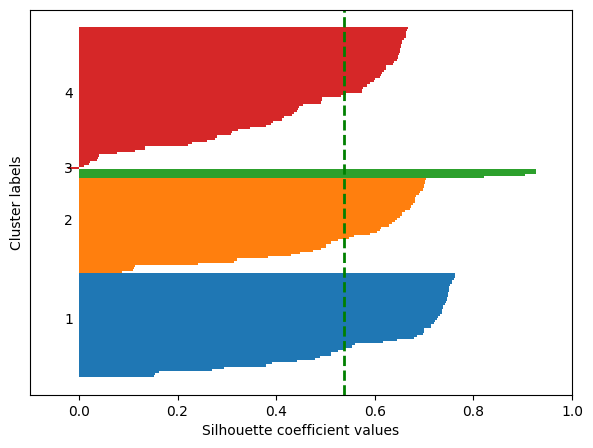

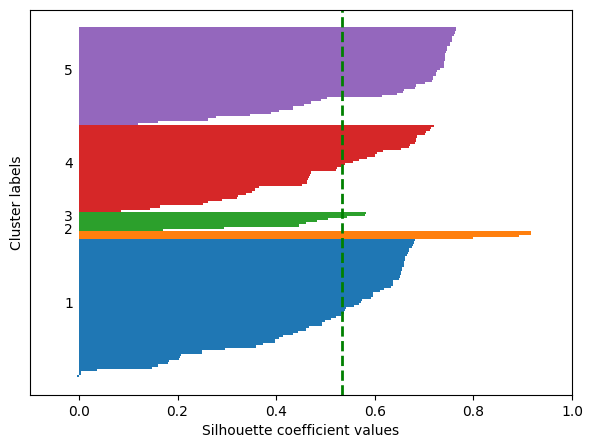

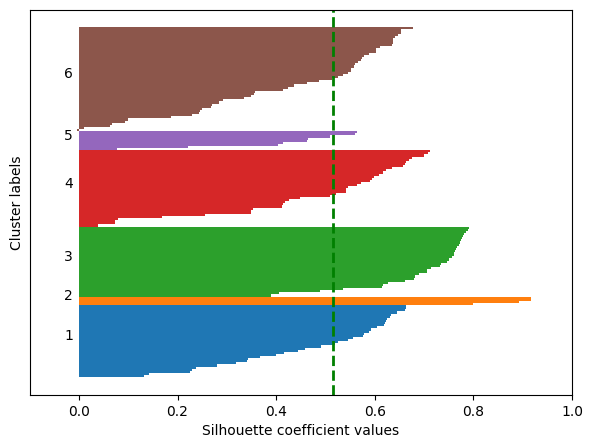

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def model_KMeans(df, k):
  model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
  y_pred = model.labels_
  print(k, ' clusters')
  print('Silhouette Score: ', silhouette_score(df, y_pred))
  print('Subjects per Cluster: ', pd.Series(y_pred).value_counts().sort_index().values, '\n')

  display_silhouette(k, df, y_pred)

  return y_pred

def display_silhouette(k, df, y_pred):
    silhouette_vals = silhouette_samples(df, y_pred)

    plt.figure(figsize=(7, 5))
    y_ticks = []
    y_lower = y_upper = 0
    for i, cluster in enumerate(np.unique(y_pred)):
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')

    return plt

for k in range(2, 7): #Set number of clusters to test
  model_KMeans(mean_df, k) #df name?

##2(b) K-Means with Optimal Number of Clusters

##2(c) Characteristics by Cluster

Heatmap of mean of variables

##2(d) Cluster labels on Worldmap

In [ ]:
import plotly.express as px
fig = px.choropleth(df, locations="country", #set df name
                    locationmode='country names',
                    color="gdpp",##change

)
fig.show()

##2(e) Cluster labels on pairplot, PCA, bi-plot